Date Created: 10/10/20
## Goal of Notebook: Create Network of Gene Co-Occurance
Use network to pull out structure

In [1]:
import requests 
import pandas as pd
from random import sample 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns                                                             
import sys 
from networkx.algorithms import bipartite
from networkx.algorithms.community import greedy_modularity_communities

Create gene co occurance network where states are the "gene identifier" is function of the gene, making NKF genes one node

In [2]:
gene_identifier = "pham"

Load in phage dataframes

In [3]:
df_phages = pd.read_csv("data/phage_metadata.csv")
# add filter here
# df_phages = df_phages[df_phages["subcluster"] == 'A2']
df_phages.head()

,phage,temperate,cluster,subcluster,morphotype,host genus,host species,genome length,is annotated,is phamerated,gcpercent
0,20ES,True,A,A2,SIPHO,Mycobacterium,smegmatis,53124.0,False,True,63.4
1,244,True,E,NaN,SIPHO,Mycobacterium,smegmatis,74483.0,True,True,63.4
2,32HC,True,Z,NaN,SIPHO,Mycobacterium,smegmatis,50781.0,False,True,65.7
3,39HC,False,B,B6,SIPHO,Mycobacterium,smegmatis,71565.0,False,True,70.0
4,40AC,True,A,A17,SIPHO,Mycobacterium,smegmatis,53396.0,False,True,63.3


In [4]:
df_genes = pd.read_csv("data/cleaned_gene_list.csv")
df_genes = df_genes[df_genes["phage"].isin(df_phages["phage"].unique())]
if gene_identifier == "function":
    df_genes = df_genes[df_genes["function"]!="NKF"][df_genes["function"]!="-1"]
df_genes.head()

,gene ID,pham,function,translation,orientation,phage,gene number,uncleaned function
0,20ES_CDS_1,36676,NKF,MYGTRSSAFWASQPGKFDVLNLRMTFPSTSAHEIPDLTATDFVPEN...,F,20ES,1,NaN
1,20ES_CDS_10,39578,lysin b,MSLQVGSSGELVNRWIRVMKARFASYAGKLKEDGYFGLDDKAVQQE...,F,20ES,10,lysin b
2,20ES_CDS_11,34196,terminase,MSLENHHPELAPSPPHIIGPSWQRTVDGSWHLPDPKMTLGWGVLKW...,F,20ES,11,terminase
3,20ES_CDS_12,39511,portal protein,MTAPLPGQEEIPDPAIARDEMISAFDDAVKNLKINTSYYEAERRPE...,F,20ES,12,portal protein
4,20ES_CDS_13,21454,capsid maturation protease,MITAAVAAYVQRFASMFTGPALSLGEWARFLQTLFPEVQRRYAQAA...,F,20ES,13,capsid maturation protease


# Gene Co-Occurrence Network

Create gene co occurance network. Undirected networks, nodes are genes and edge between i - j represents that i and j appear in at least one genome. Then the weight of edges are how many genomes have both i and j in them

In [5]:
# get phage list
phages = df_phages["phage"].unique()

G_co = nx.Graph()#intialize graph

# go through each unique gene indet and add node with attributes
for gene in df_genes[gene_identifier].unique():
    G_co.add_node(gene, temperate = 0, count = 0)

# iterate through all phages
for phage in phages:
    print(phage)
    # genes in a specific phage
    genes = df_genes[df_genes["phage"] == phage][gene_identifier].to_numpy()
    
    # temperate of phages (so in the future we can look at temperate dependences)
    temperate = df_phages[df_phages["phage"]==phage]["temperate"].to_numpy()[0]
    
    # for each gene pairs
    for i in range(len(genes)):
        G_co.nodes[genes[i]]["temperate"] = G_co.nodes[genes[i]]["temperate"] + (1 if temperate else 0)
        G_co.nodes[genes[i]]["count"] = G_co.nodes[genes[i]]["count"] + 1
        # iterate through other genes
        for j in range(i,len(genes)):
            if i != j: # don't have self edges
                if G_co.has_edge(genes[i], genes[j]): # if edge exists add wieght
                    G_co.edges[genes[i],genes[j]]["weight"] = G_co.edges[genes[i],genes[j]]["weight"] + 1
                else:
                    G_co.add_edge(genes[i], genes[j], weight = 1)


20ES
244
32HC
39HC
40AC
40BC
Aaronocolus
Abba
AbbeyMikolon
AbbyPaige
AbbysRanger
ABCat
Abdiel
Abidatro
Abinghost
Abrogate
AbsoluteMadLad
Abt2graduatex2
ABU
Acadian
ACFishhook
Achebe
Acme
Acolyte
Acquire49
ActinUp
Adahisdi
Adaia
Adat
Adelaide
Adephagia
Adgers
Ading
Adjutor
Adlitam
Adnama
Adolin
Adonis
Adora
Adriana
Adumb2043
Adzzy
Aelin
Aeneas
Aesir
Affeca
AFIS
Agape74
Agatha
AgentM
Aggie
Aglet
AgronaGT15
Ailee
Airmid
Ajay
Akhila
Akoma
Akoni
AlainaMarie
Alakazam
AlanGrant
Alatin
Albee
Albright
Aledel
Aleemily
Alex44
AlexAdler
Alexphander
Ali17
Alice
AlishaPH
Aliter
Alleb
AlleyCat
Alma
AloeVera
Alpacados
Alsaber
Alsfro
AltPhacts
Altwerkus
Alvin
Alvy
Alyxandracam
Amataga
Amela
Amelia
Amelie
Amethyst
Amgine
Amigo
Aminay
Amochick
Amohnition
Amore2
Amyev
AN3
AN9
Anakin
Anamika
Anansi
Anatole
Anaya
AnClar
Anderson
Andies
AndPeggy
Andrew
Andromedas
Aneem
Angelicage
Angelica
Angelique
Angel
Anglerfish
AngryOrchard
ANI8
Animus
Anjali
Annadreamy
AnnaL29
AnnaLie
AnnaSerena
Annihilator
Annyong
Anon

Erla
ErnieJ
Eros
Esketit
Esperer
Espica
Espinosa
Essence
Estave1
EstebanJulior
Estes
ET08
Et2Brutus
Etna
Etta
EugeneKrabs
Eugenia
Eunoia
Euphoria
Euratis
Eureka
Evamon
Evanesce
Eviarto
EvilGenius
Evy
Ewald
Ewok
Exiguo
Expelliarmus
ExplosioNervosa
Eyes
Eyre
Fabian
Fairfaxidum
Faith1
Faith5x5
Faja
Fajezeel
Fameo
Familton
Fancypants
Fang
Farber
Fascinus
Faust
Faze9
Feastonyeet
Fede
Fefferhead
FelixAlejandro
Fenn
Fenry
Fernando
FF47
Fibonacci
FidgetOrca
Filch
Filuzino
Finch
Findley
Finemlucis
Finnry
Finny
Fionnbharth
Fireball
Firecracker
Firehouse51
Fireman
FireRed
FiringLine
FirstPlacePfu
First
Fishburne
Fizzles
Flabslab
FlagStaff
Flakey
Flapper
Flare16
Flathead
Flaverint
Floof
Florean
Florinda
FlowerPower
Fludd
FluffyNinja
Fluke
Flux
Flypotenuse
ForGetIt
Forge
Fork
Forrest
Forsytheast
Forthebois
Fortunato
Forza
Fosterous
Fowlmouth
Foxboro
FoxtrotP1
Francis47
Frankie
Franklin22
Franzy
FrayBell
Fred313
FreddieHg
Frederick
FrenchFry
Freya
FriarPreacher
Fringe
FrodoSwaggins
Froghopper
Frokos

MichaelScott
MichelleMyBell
Michelle
Michley
Microdon
Microwolf
Midas2
MikeLiesIn
Mikota
Miko
MilanaBonita
Mildred21
Miley16
MilleniumForce
Millski
MillyPhilly
Milly
Mimi
Min1
MindFlayer
Mindy
MinecraftSteve
Minerva
MiniLon
MiniMac
Minima
MinionDave
Miniwave
Minnie
MintFen
Miramae
Mischief19
Misfit
Misha28
Misomonster
MissDaisy
MissWhite
MISSy
MisterCuddles
Mithril
MitKao
Mitti
MK4
MkaliMitinis3
Moab
Mocha12
Modragons
Mojorita
Moki
Moldemort
Molivia
Mollymur
Moloch
MoMoMixon
Momo
MonChoix
MoneyMay
Monty
MooMoo
Moonbeam
MOOREtheMARYer
Moosehead
Moose
Moozy
Mordred
Morgushi
Morizzled23
Morpher26
Morrissey
Morrow
Mortcellus
Morty007
Morty
Mosaic
Mosby
MosMoris
Mova
Mowgli
Moyashi
Mozy
MPhalcon
MPlant7149
MRabcd
MrAK
MrGloopy
MrGordo
MrMagoo
MrMiyagi
MrWorldwide
Mryolo
Msay19
MScarn
MsGreen
mu16
MuchMore
Mudcat
Muddy
Mufasa8
Mufasa
MuffinTheCat
Mulan
MulchMansion
Mulch
Mulciber
Mule
Munch
Mundrea
Muntaha
Murdoc
Murica
Murphy
Murucutumbu
Musetta
Museum
Mutaforma13
Mutante
Muttlie
Mutzi
Mynx

Squiddly
Squid
Squiggle
Squint
Squirty
Sros11
StAB
Stagni
Stanktossa
StAnnes
Starbow
Stark
StarLord
StarPlatinum
StarStuff
Stasia
Stayer
StCroix
SteamedHams
Steamy
StephanieG
Stephig9
StepMih
SteveFrench
StevieBAY
StevieRay
StewieGriff
Stickynote
Stiles
Stinger
StingRay
Stinson
STLscum
StolenFromERC
Stoor
Stormageddon
Stormborn
Stormbreaker
Strathdee
Stratus
StrawberryJamm
StrepC
StressBall
Strokeseat
Stromboli
StrongArm
Strosahl
Struggle
Stubby
Stultus
Sucha
Suerte
Suffolk
Suigeneris
Sujidade
Sukkupi
Sulley
Sumter
Supakev
SuperAwesome
SuperCallie99
Superchunk
Superfresh
SuperGrey
Supernova
Superphikiman
SuperSulley
Suppi
Surely
Suscepit
Sushi23
Suzy
SV1
SwagPigglett
Swann
SweatNTears
SweetiePie
Sweets
Swenson
Swirley
Swish
SwissCheese
Switzer
Syleon
Synepsis
SynergyX
TA17a
Tachez
TaeYoung
Taheera
TaidaOne
Taj14
Taj
Takoda
TallGrassMM
Tandem
Tangent
Tangerine
Tanis
Tank
Tapioca
Taptic
Taquarus
Taquito
Targaryen
Target
Tarkin
TarsusIV
Tarynearal
Tasp14
Tatanka
TatarkaPM
TattModd
Taurus


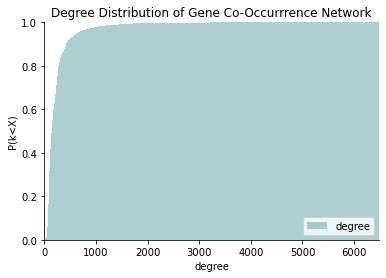

In [6]:
degs = [j for i,j in G_co.degree()]
plt.hist(degs , bins = 1000, density = True, cumulative=True, alpha = 0.5, color = "cadetblue", label = "degree")
plt.xlim(left = 0, right = max(degs))
plt.ylim(top=1)


plt.xlabel("degree")
plt.ylabel("P(k<X)")
plt.title("Degree Distribution of Gene Co-Occurrrence Network")
plt.legend(loc="lower right")
sns.despine()
plt.show()

In [7]:
print("mean degree:",G_co.size()*2/len(G_co.nodes()))

mean degree: 226.31715266611621


In [8]:
# nx.write_gml(G_co, "networks/co_occurrence_graph"+ str(gene_identifier), stringizer = str)

In [9]:
print("# of nodes:", len(G_co.nodes()))
print("# of edges:", G_co.size())

# of nodes: 23011
# of edges: 2603892


In [10]:
if  len(G_co.nodes())<120:
    pos = nx.random_layout(G_co)
    node_size = [G_co.nodes[i]["count"] for i in G_co.nodes()]
    plt.figure(figsize=(15,15))
    nx.draw_networkx_nodes(G_co,
                           pos = pos,
                           node_size = node_size
                            )
    nx.draw_networkx_edges(G_co,
                           pos = pos,
                           node_size = node_size,
                           alpha = 0.1
                           )
    sns.despine(bottom=True, left = True)
    plt.show()

In [11]:
if  len(G_co.nodes())<120:
    plt.figure(figsize=(15,15))
    pos = nx.spring_layout(G_co, k = 10)
    node_size = [G_co.nodes[i]["count"]/len(phages)*1000 for i in G_co.nodes()]
    degree_centrality = nx.degree_centrality(G_co)
    node_color = [degree_centrality[i] for i in G_co.nodes()]
    labels = {i:i.replace(" "," \n")for i in G_co.nodes()}
    plt.figure(figsize=(15,15))
    nx.draw_networkx_nodes(G_co,
                           pos = pos,
                           node_color = "#96c4d6",
                           node_size = node_size
                            )
    nx.draw_networkx_edges(G_co,
                           pos = pos,
                           node_size = node_size,
                           alpha = 0.1
                           )
    nx.draw_networkx_labels(G_co, 
                            pos = pos, 
                            alpha = 0.99,
                           font_size=8,
                           labels=labels)
    
    sns.despine(bottom=True, left = True)
    plt.show()

# Gene Dependency Network

In [12]:
G_dep = nx.DiGraph()

# add all edges
for i,j in G_co.edges():
    # if everytime i is in a genome so is j then i is dependent on j
    if G_co.edges[i,j]["weight"] == G_co.nodes[i]["count"]: # i is depe
        G_dep.add_edge(str(i),str(j), weight=G_co.edges[i,j]["weight"])
        #print(i,"({})".format(G_co.nodes[i]["count"]),"depends on",j,"({})".format(G_co.nodes[j]["count"]))
    
    # if everytime j is in a genome so is i then j is dependent on i
    if G_co.edges[i,j]["weight"] == G_co.nodes[j]["count"]:
        G_dep.add_edge(str(j), str(i), weight=G_co.edges[i,j]["weight"])
        #print(j ,"({})".format(G_co.nodes[j]["count"]),"depends on",i,"({})".format(G_co.nodes[i]["count"]))
        
# update node attributes
for i in G_co.nodes():
    if G_dep.has_node(i):
        G_dep.nodes[i]["temperate"] = G_co.nodes[i]["temperate"]
        G_dep.nodes[i]["count"] = G_co.nodes[i]["count"]


Look at centralities to see what genes are the most 'important' or have the most dependent genes

In [13]:
in_degree_centrality = nx.in_degree_centrality(G_dep)

In [14]:
in_degree_dict = {k: v for k, v in sorted(in_degree_centrality.items(), key=lambda item: item[1], reverse=True)}

In [15]:
if  len(G_dep.nodes())<120:
#     pos = nx.spring_layout(G_co, k = 10)
    plt.figure(figsize=(10,10))
    node_size = [G_co.nodes[i]["count"]/len(phages)*1000 for i in G_dep.nodes()]
    node_color = [in_degree_centrality[i] for i in G_dep.nodes()]
    labels = {i:i.replace(" "," \n")for i in G_dep.nodes()}
    plt.figure(figsize=(15,15))
    nx.draw_networkx_nodes(G_dep,
                           node_color = node_color,
                           pos = pos,
                           node_size = node_size,
                           cmap=plt.cm.Blues
                            )
    nx.draw_networkx_edges(G_dep,
                           pos = pos,
                           node_size = node_size,
                           alpha = 0.1
                           )
    nx.draw_networkx_labels(G_dep, 
                            pos = pos, 
                            alpha = 0.99,
                           font_size=8,
                           labels=labels)
    sns.despine(bottom=True, left = True)
    plt.show()

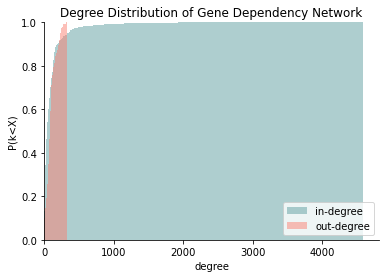

In [16]:
in_degs = [j for i,j in G_dep.in_degree()]
out_degs = [j for i,j in G_dep.out_degree()]
plt.hist(in_degs , bins = 1000, density = True, cumulative=True, alpha = 0.5, color = "cadetblue", label = "in-degree")
plt.hist(out_degs, bins = 1000, density = True, cumulative=True, alpha = 0.5, color = "salmon", label = "out-degree")
plt.xlim(left = 0)
plt.ylim(top=1)
#plt.xscale('log')
#plt.yscale('log')
plt.xlabel("degree")
plt.ylabel("P(k<X)")
plt.title("Degree Distribution of Gene Dependency Network")
plt.legend(loc="lower right")
sns.despine()
plt.show()

In [17]:
print("# of nodes:", len(G_dep.nodes()))
print("# of edges:", G_dep.size())

degs = [j for i,j in G_dep.degree()]
print("mean degree:", np.mean(degs))
print("reciprocity:",nx.overall_reciprocity(G_dep))

# of nodes: 23011
# of edges: 2104313
mean degree: 182.89626700273783
reciprocity: 0.31716764568769


In [18]:
depended_on = 0
dependent = 0
mixed = 0
for i in G_dep.nodes():
    if G_dep.in_degree(i) > 0 and G_dep.out_degree(i) > 0:
        mixed = 1 + mixed
    elif G_dep.in_degree(i) > 0:
        depended_on = 1 + depended_on
    elif G_dep.out_degree(i) > 0:
        dependent = 1 + dependent
print("depended_on", depended_on)
print("dependent", dependent)
print("mixed", mixed)        

depended_on 1166
dependent 730
mixed 21115


In [19]:
print("depended_on", depended_on/len(G_dep.nodes))
print("dependent", dependent/len(G_dep.nodes))
print("mixed", mixed/len(G_dep.nodes))   

depended_on 0.0506714180174699
dependent 0.03172395810699231
mixed 0.9176046238755378


In [20]:
# nx.write_gml(G_dep, "networks/dependency_graph"+ str(gene_identifier), stringizer = str)

How are temperate phages dependency graphs different?